In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time as t
from timeit import default_timer as timer
import finite_diff_mode_solver as f

# Initialize all needed parameters

In [2]:
grid_size = 100
# 400 grid points provide smooth results
number_points = 400
h = grid_size / (number_points - 1)
lam = 0.78
k0 = 2 * np.pi / lam
e_substrate = 1.5 ** 2
delta_e = 1.5e-2
w = 15.0

x = np.linspace(-grid_size / 2, grid_size / 2, number_points)
prm = e_substrate + delta_e * np.exp(- (x / w) ** 2)

# Calculate Modes

In [3]:
a = timer()
eff_eps, vecs = f.guided_modes_1DTE(prm, k0, h, dtype_mat=np.float32)
b = timer()
print("Time elapsed single precision {:.5f}s".format(b - a))


a = timer()
eff_eps, vecs = f.guided_modes_1DTE(prm, k0, h)
b = timer()
print("Time elapsed double precision {:.5f}s".format(b - a))

Time elapsed single precision 0.48202s
Time elapsed double precision 0.47738s


# Final Plots

Text(0, 0.5, 'Normalized Electrical field strength')

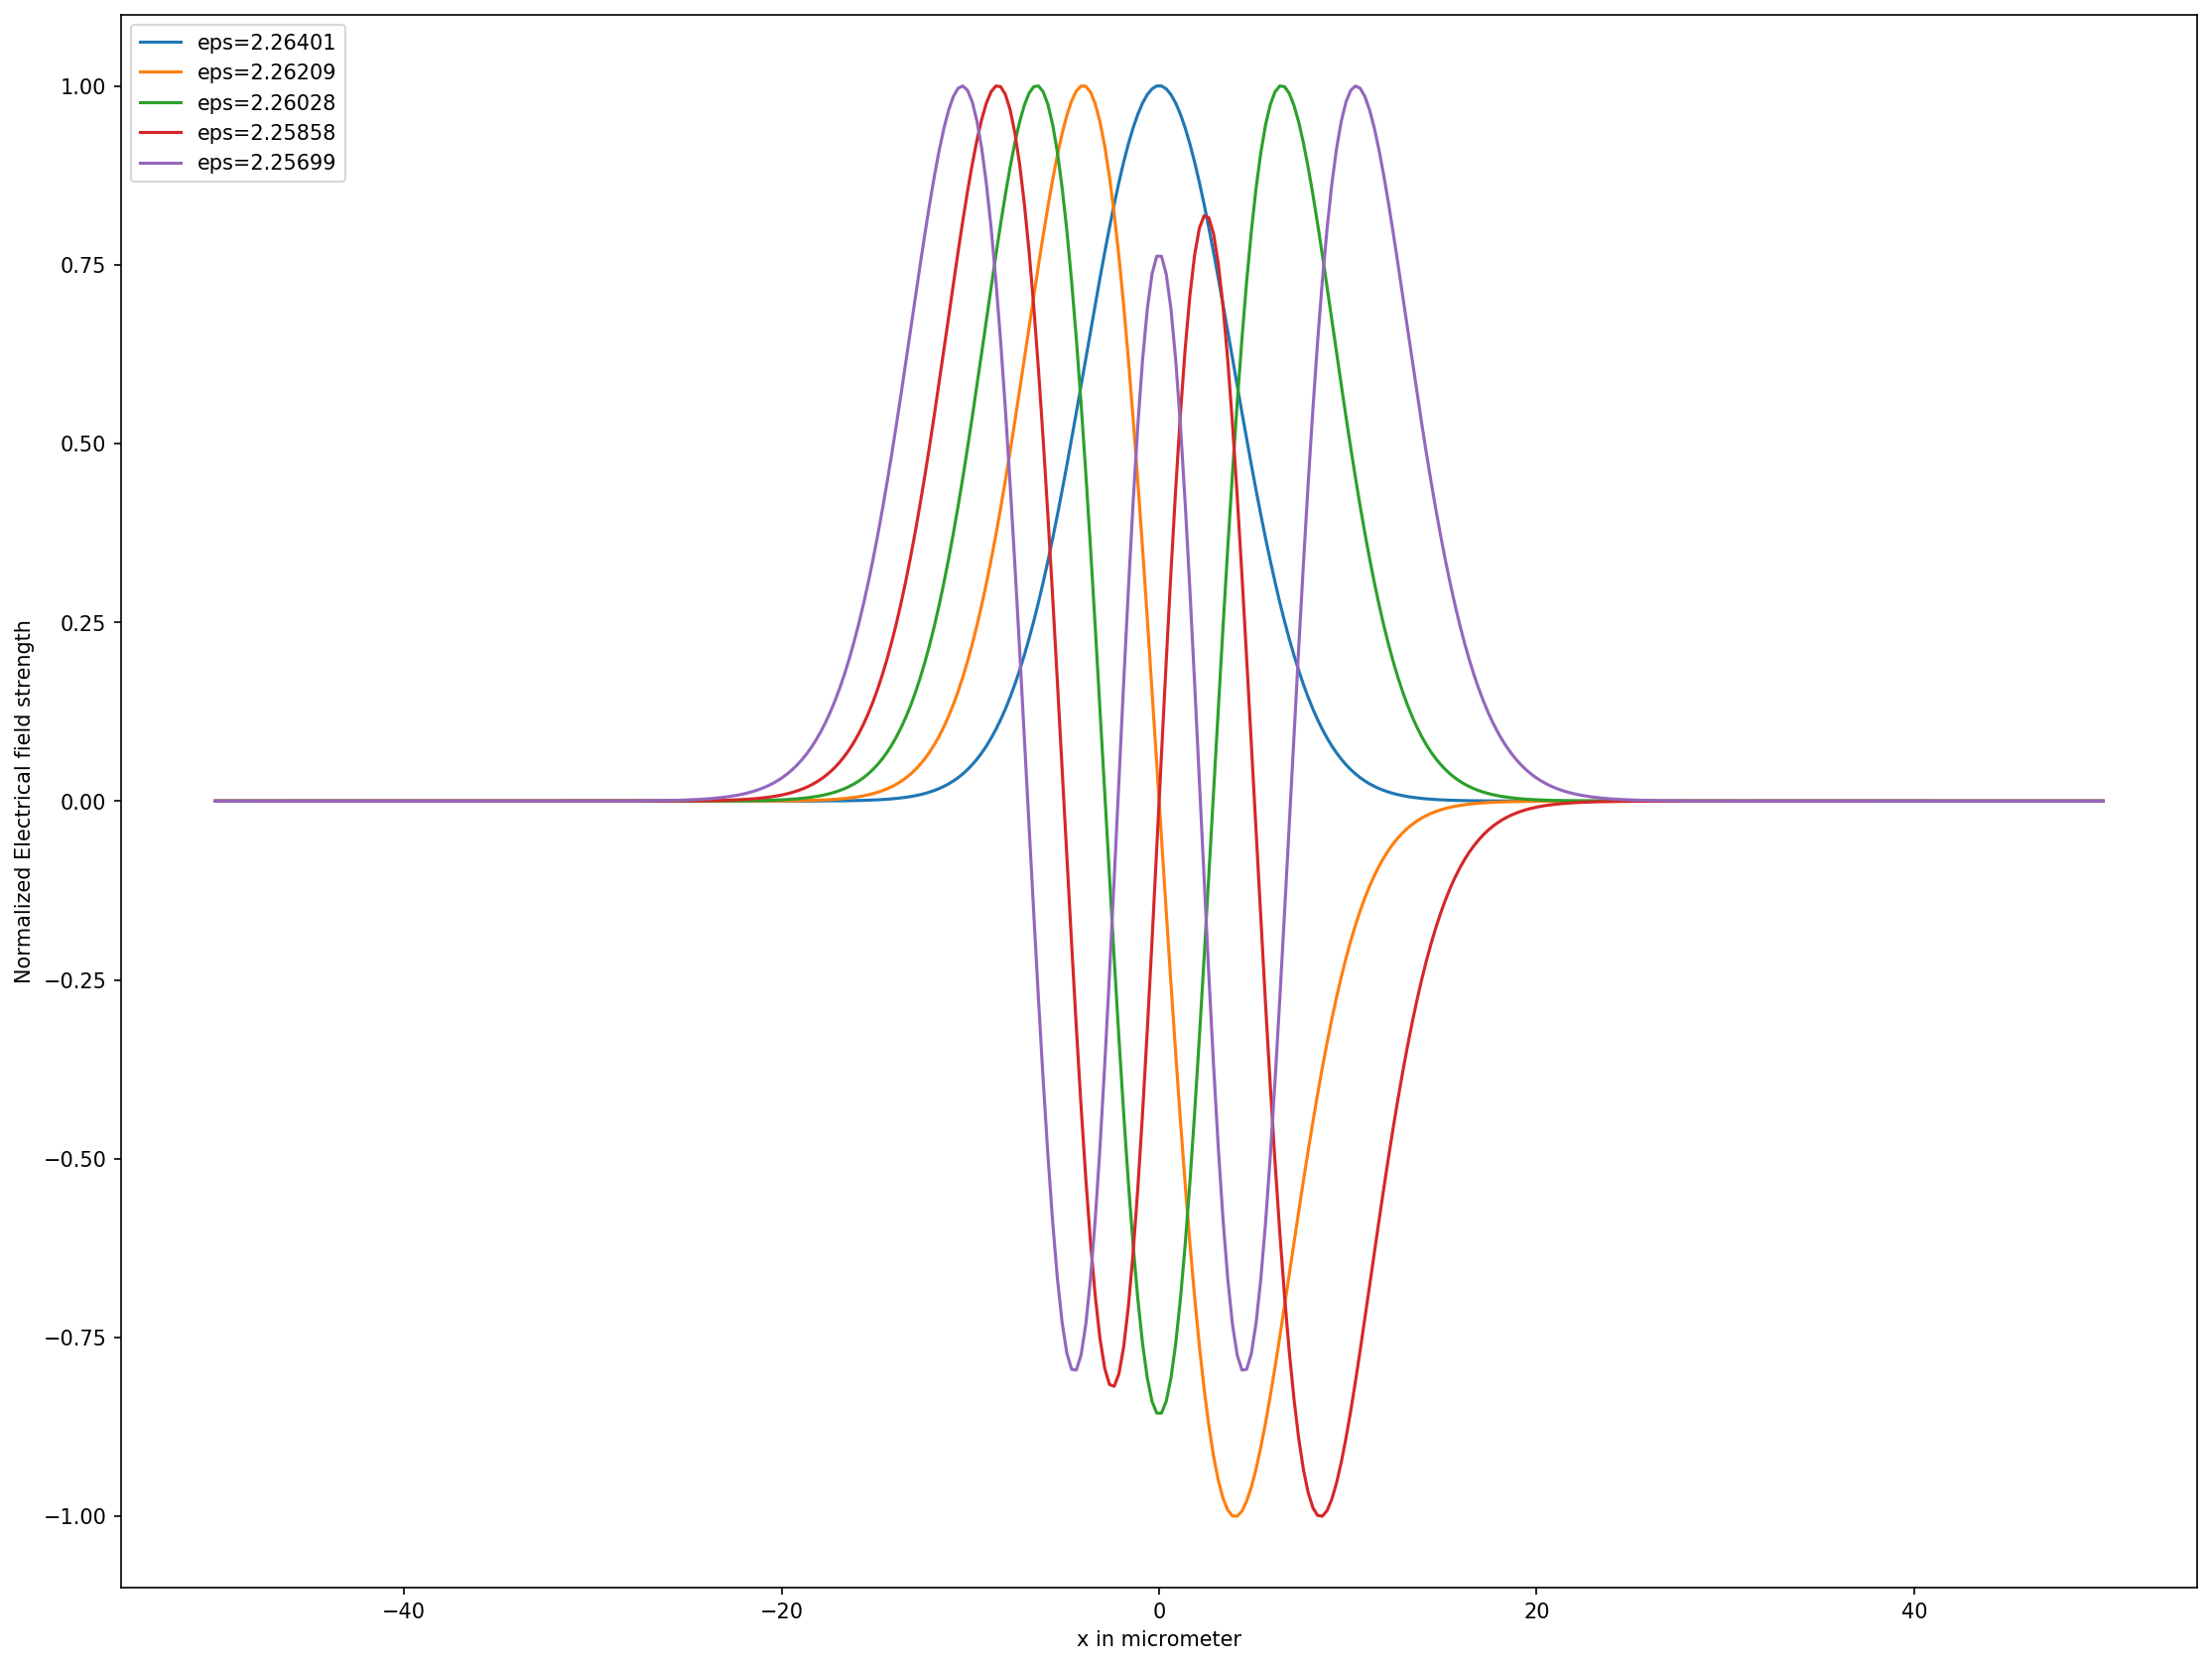

In [4]:
fig=plt.figure(figsize=(18, 14), dpi=150, facecolor='w', edgecolor='k')
num_modes = 5
for eps, v in zip(eff_eps[0:num_modes], vecs[0:num_modes]):
    plt.plot(x, v, label="eps={:.5f}".format(eps))
plt.legend(loc="upper left") 
plt.xlabel("x in micrometer")
plt.ylabel("Normalized Electrical field strength")

# Initialization of Task II

In [5]:
grid_size_x = 50
grid_size_y = 50
# 400 grid points provide smooth results
num_x = 300
num_y = 300
h = grid_size / (num_x - 1)
lam = 0.78
k0 = 2 * np.pi / lam
e_substrate = 1.5 ** 2
delta_e = 1.5e-2
w = 15.0

x = np.linspace(-grid_size_x / 2, grid_size_x / 2, num_x).astype(np.float16)
y = np.linspace(-grid_size_y / 2, grid_size_y / 2, num_y).astype(np.float16)
x, y = np.meshgrid(x, y)
prm = e_substrate + delta_e * np.exp(- (x **2 + y**2) / w ** 2)

# Calculate 2D Modes

In [6]:
num_modes = 9

a = timer()
eff_eps2d_sp, vecs2d_sp = f.guided_modes_2D(prm, k0, h, num_modes, dtype_mat=np.float32)
b = timer()
print("Time elapsed single precision \t {:.5f}s".format(b - a))


a = timer()
eff_eps2d_dp, vecs2d_dp = f.guided_modes_2D(prm, k0, h, num_modes)
b = timer()
print("Time elapsed double precision \t{:.5f}s".format(b - a))

Time elapsed single precision 	 5.84436s
Time elapsed double precision 	18.92107s


# Final 2D Images

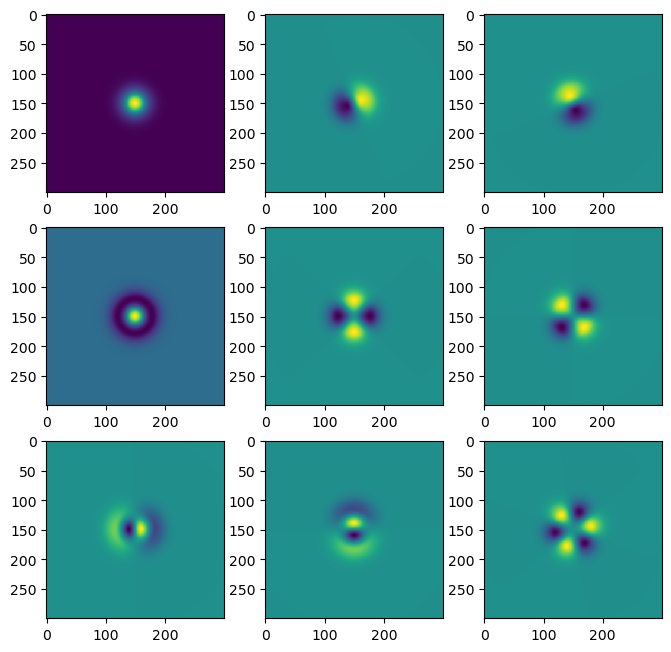

In [7]:
fig=plt.figure(figsize=(8, 8), dpi=100, facecolor='w', edgecolor='k')
for i in range(num_modes):
    plt.subplot(num_modes / 3, 3, i + 1)
    plt.imshow(vecs2d_dp[i])

# Single vs Double Precision

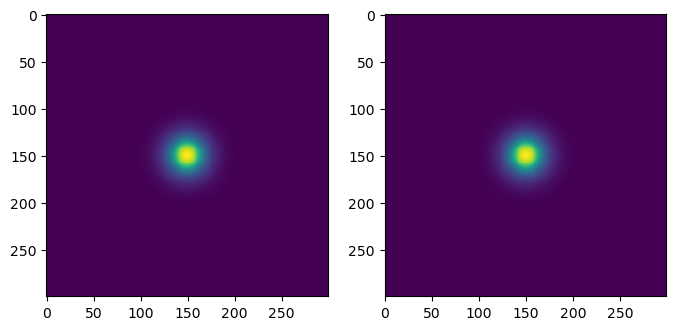

In [8]:
fig=plt.figure(figsize=(8, 8), dpi=100, facecolor='w', edgecolor='k')
plt.subplot(1, 2, 1)
plt.imshow(vecs2d_dp[0])
plt.subplot(1, 2, 2)
plt.imshow(vecs2d_sp[0])

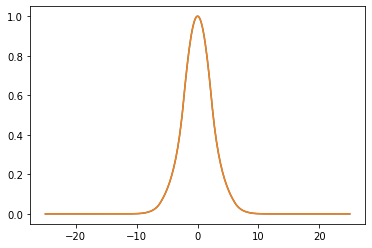

In [9]:
plt.plot(x[0], vecs2d_dp[0][num_x // 2, :])
plt.plot(x[0], vecs2d_sp[0][num_x // 2, :])